In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In [29]:

# Crear un conjunto de datos de ejemplo
X, ground_truth_labels = make_blobs(n_samples=2000, n_features=6, centers=4, random_state=42, cluster_std=2.0)

# Escalar los datos para mejorar el rendimiento de algunos modelos
X = StandardScaler().fit_transform(X)

# Función para visualizar los clusters
def visualizar_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(title)
    plt.show()
    
# Función para calcular la pureza
def purity_score(y_true, y_pred):
    contingency_matrix = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

# Función para evaluar y mostrar métricas
def evaluar_clusters(y_true, y_pred, modelo):
    purity = purity_score(y_true, y_pred)
    rand_score = adjusted_rand_score(y_true, y_pred)
    
    print(f'Modelo: {modelo}')
    print(f'Purity: {purity:.4f}')
    print(f'Adjusted Rand Score: {rand_score:.4f}')
    
def visualizar_clusters_3D(X, labels, title):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=50)
    ax.set_title(title)
    plt.show()
    
def grafico_silueta(X, labels, title):
    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)

    fig, ax = plt.subplots()
    y_lower = 10

    for i in range(len(set(labels))):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / len(set(labels)))
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(title)
    ax.set_xlabel("Valor de Silueta")
    ax.set_ylabel("Etiqueta del Cluster")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Limpiar y-axis labels
    
def mapa_calor_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Etiquetas Predichas")
    plt.ylabel("Etiquetas Reales")
    plt.show()
    
    

C:\Users\herre\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Modelo: K-Means
Purity: 0.9985
Adjusted Rand Score: 0.9960


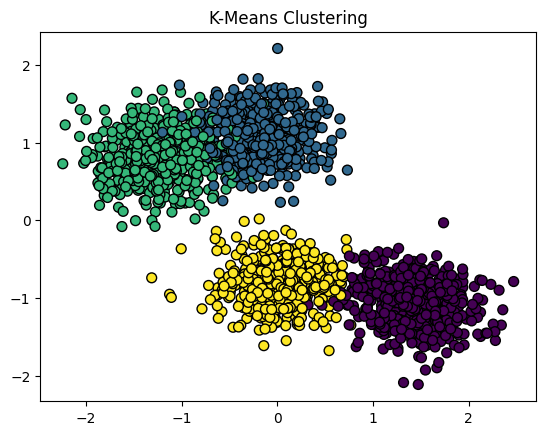

Modelo: Gaussian Mixture Model
Purity: 0.7490
Adjusted Rand Score: 0.6273


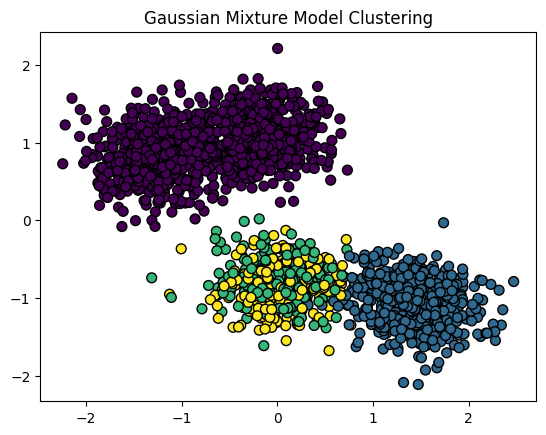

Modelo: Hierarchical Clustering
Purity: 0.9980
Adjusted Rand Score: 0.9947


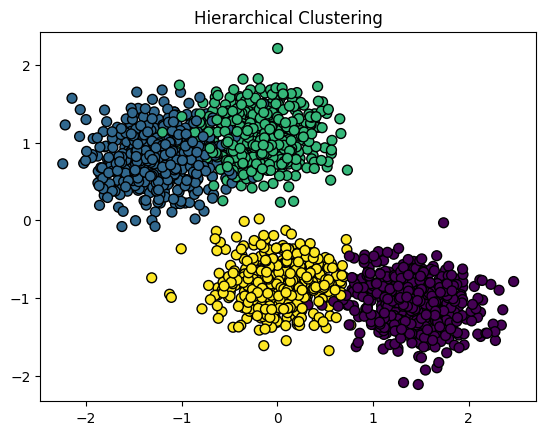

Modelo: DBSCAN
Purity: 0.2610
Adjusted Rand Score: 0.0001


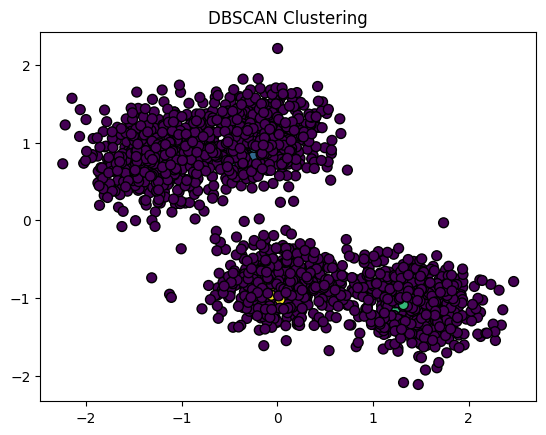

Modelo: Spectral Clustering
Purity: 0.9995
Adjusted Rand Score: 0.9987


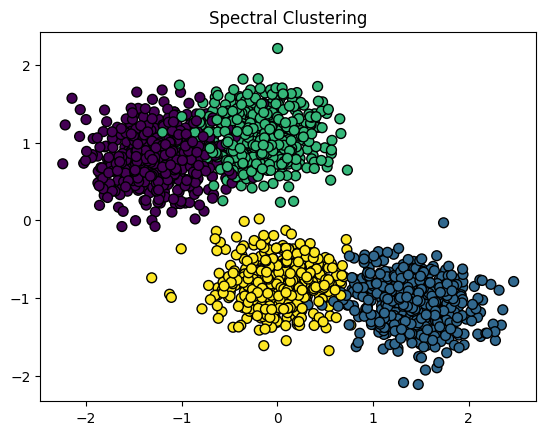

In [24]:

# K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
evaluar_clusters(ground_truth_labels, kmeans_labels, 'K-Means')
visualizar_clusters(X, kmeans_labels, "K-Means Clustering")
visualizar_clusters_3D(X, kmeans_labels, "K-Means Clustering (3D)")
grafico_silueta(X, kmeans_labels, "Gráfico de Silueta para K-Means")
mapa_calor_confusion(ground_truth_labels, kmeans_labels, "Matriz de Confusión para K-Means")


# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X)
evaluar_clusters(ground_truth_labels, gmm_labels, 'Gaussian Mixture Model')
visualizar_clusters(X, gmm_labels, "Gaussian Mixture Model Clustering")
visualizar_clusters_3D(X, kmeans_labels, "K-Means Clustering (3D)")
grafico_silueta(X, kmeans_labels, "Gráfico de Silueta para K-Means")
mapa_calor_confusion(ground_truth_labels, kmeans_labels, "Matriz de Confusión para K-Means")

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(X)
evaluar_clusters(ground_truth_labels, hierarchical_labels, 'Hierarchical Clustering')
visualizar_clusters(X, hierarchical_labels, "Hierarchical Clustering")
visualizar_clusters_3D(X, kmeans_labels, "K-Means Clustering (3D)")
grafico_silueta(X, kmeans_labels, "Gráfico de Silueta para K-Means")
mapa_calor_confusion(ground_truth_labels, kmeans_labels, "Matriz de Confusión para K-Means")

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
evaluar_clusters(ground_truth_labels, dbscan_labels, 'DBSCAN')
visualizar_clusters(X, dbscan_labels, "DBSCAN Clustering")
visualizar_clusters_3D(X, kmeans_labels, "K-Means Clustering (3D)")
grafico_silueta(X, kmeans_labels, "Gráfico de Silueta para K-Means")
mapa_calor_confusion(ground_truth_labels, kmeans_labels, "Matriz de Confusión para K-Means")

# Spectral Clustering
spectral = SpectralClustering(n_clusters=4, random_state=42)
spectral_labels = spectral.fit_predict(X)
evaluar_clusters(ground_truth_labels, spectral_labels, 'Spectral Clustering')
visualizar_clusters(X, spectral_labels, "Spectral Clustering")
visualizar_clusters_3D(X, kmeans_labels, "K-Means Clustering (3D)")
grafico_silueta(X, kmeans_labels, "Gráfico de Silueta para K-Means")
mapa_calor_confusion(ground_truth_labels, kmeans_labels, "Matriz de Confusión para K-Means")

# Make Moons

In [38]:

# Crear un conjunto de datos de ejemplo
X, ground_truth_labels = make_moons(n_samples=2000, noise=1.0, random_state=42)

# Escalar los datos para mejorar el rendimiento de algunos modelos
X = StandardScaler().fit_transform(X)

# Función para visualizar los clusters
def visualizar_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(title)
    plt.show()
    
# Función para calcular la pureza
def purity_score(y_true, y_pred):
    contingency_matrix = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

# Función para visualizar los clusters en 2D
def visualizar_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(title)
    plt.show()

# Función para visualizar los clusters en 3D (adaptada para datos 2D)
def visualizar_clusters_3D(X, labels, title):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    ax.set_title(title)
    plt.show()
    
def grafico_silueta(X, labels, title):
    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)

    fig, ax = plt.subplots()
    y_lower = 10

    for i in range(len(set(labels))):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / len(set(labels)))
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(title)
    ax.set_xlabel("Valor de Silueta")
    ax.set_ylabel("Etiqueta del Cluster")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Limpiar y-axis labels
    
def mapa_calor_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Etiquetas Predichas")
    plt.ylabel("Etiquetas Reales")
    plt.show()

C:\Users\herre\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Modelo: K-Means
Purity: 0.7195
Adjusted Rand Score: 0.0959


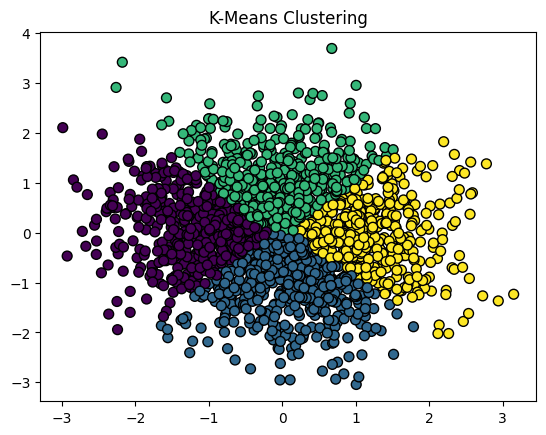

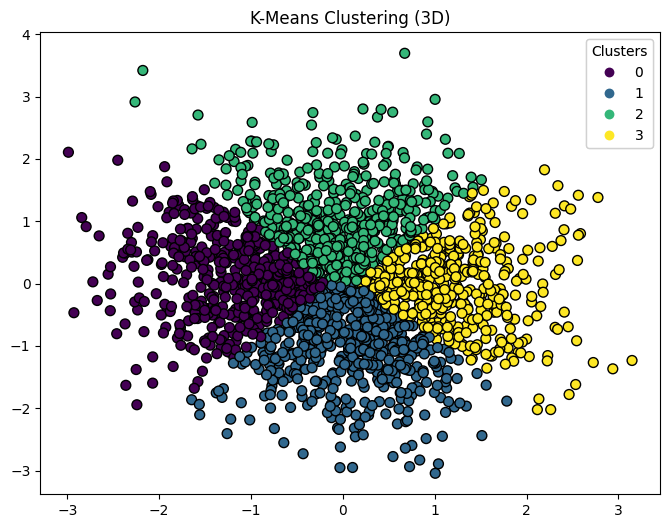

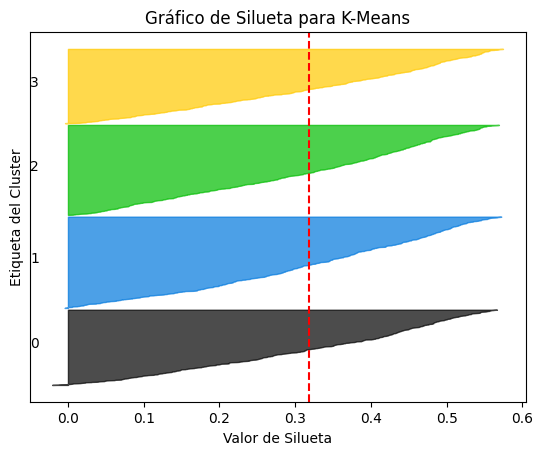

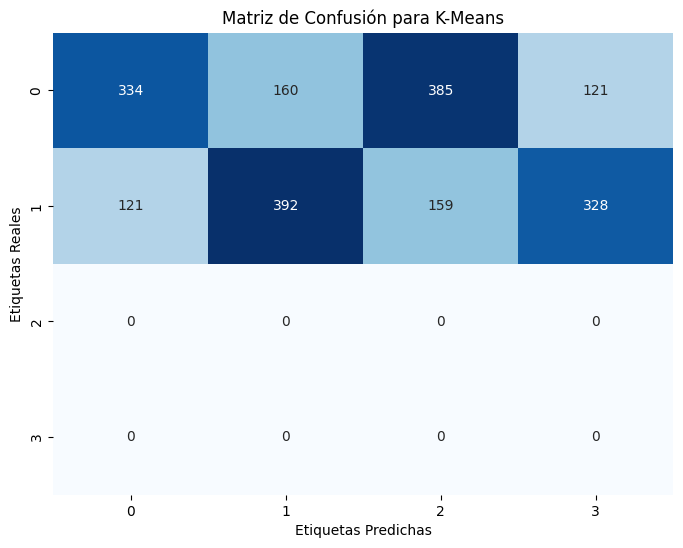

Modelo: Gaussian Mixture Model
Purity: 0.7120
Adjusted Rand Score: 0.0895


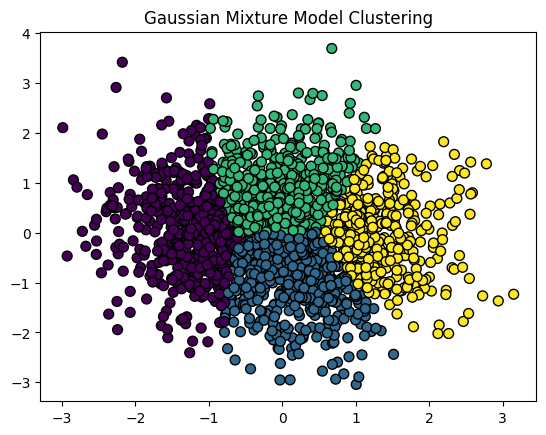

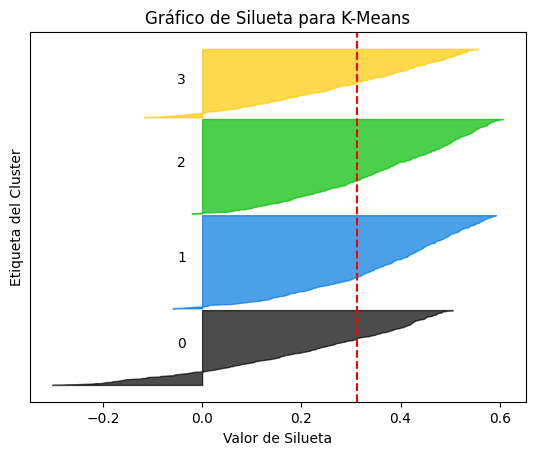

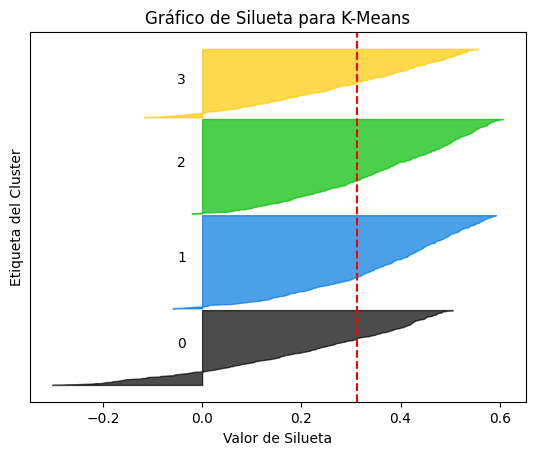

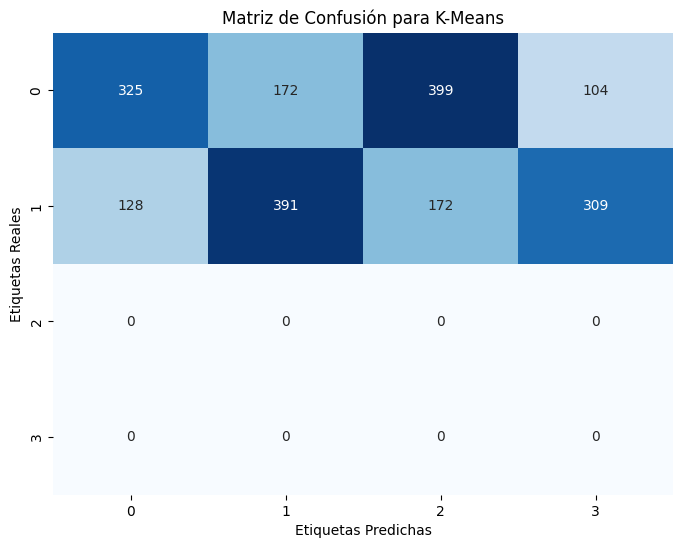

Modelo: Hierarchical Clustering
Purity: 0.6680
Adjusted Rand Score: 0.0823


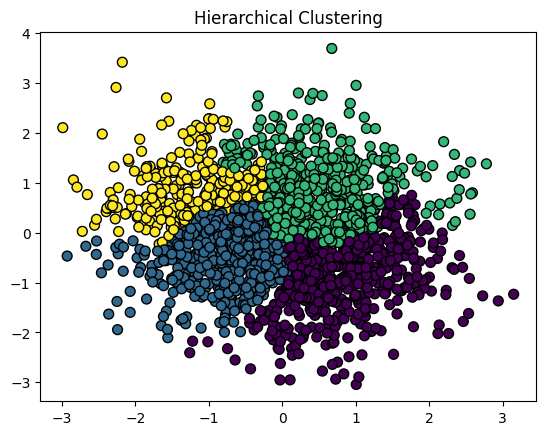

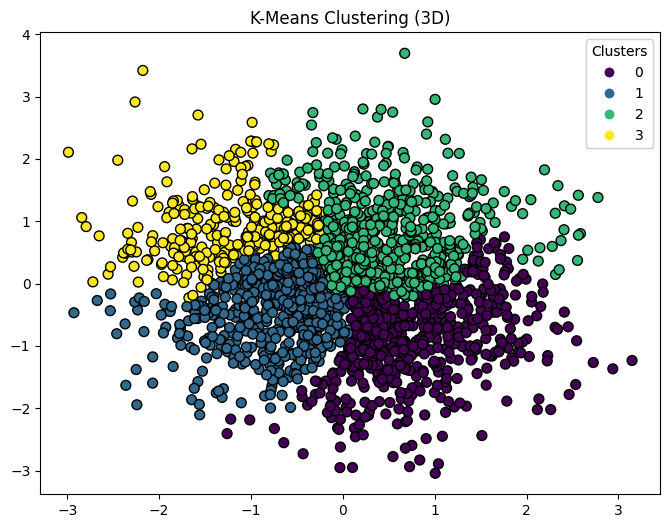

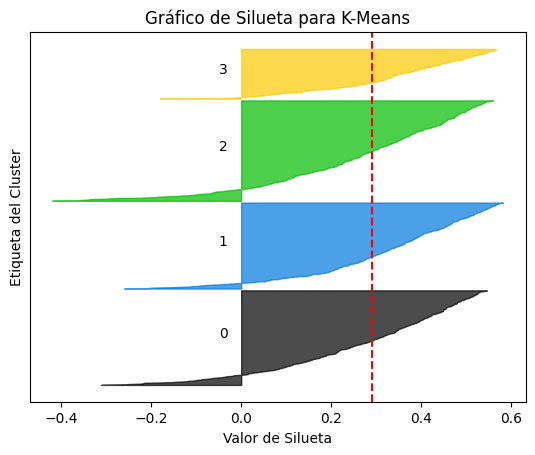

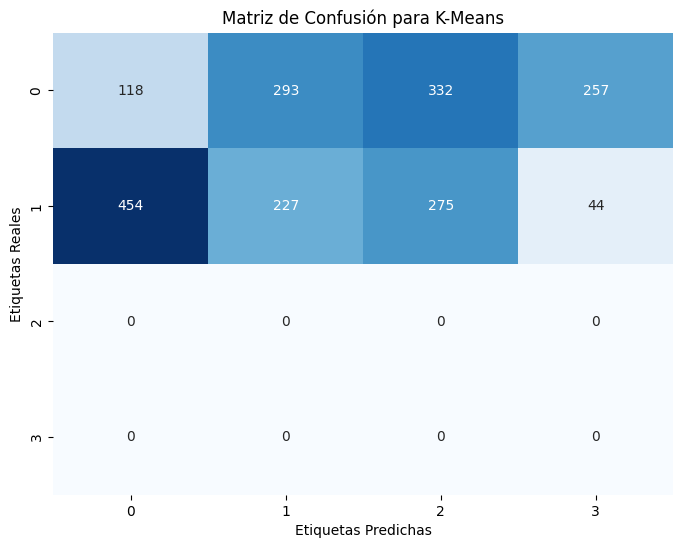

Modelo: DBSCAN
Purity: 0.5070
Adjusted Rand Score: 0.0001


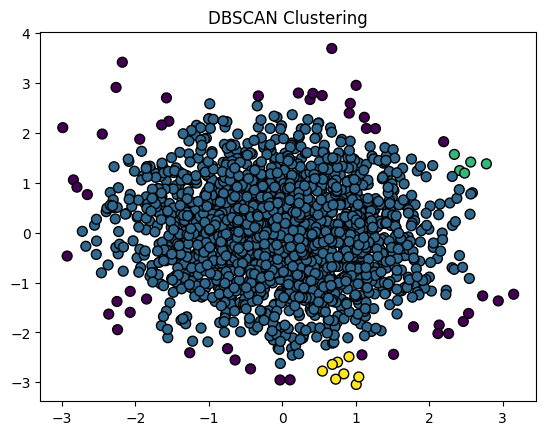

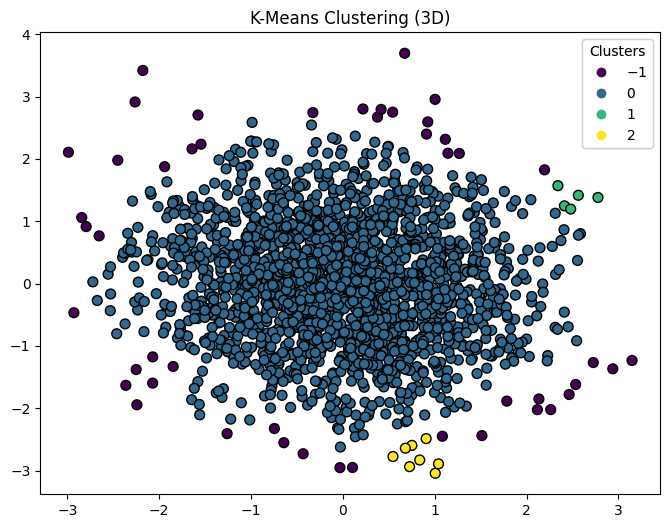

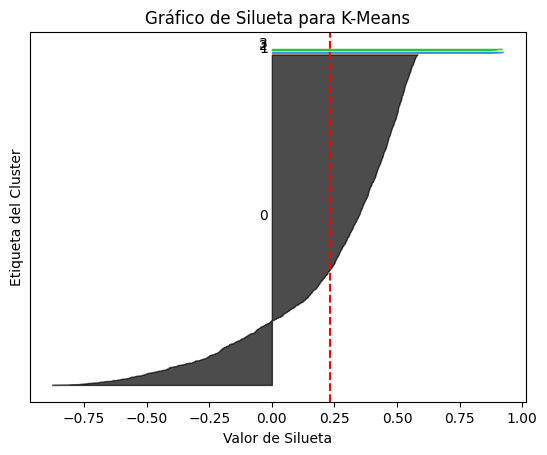

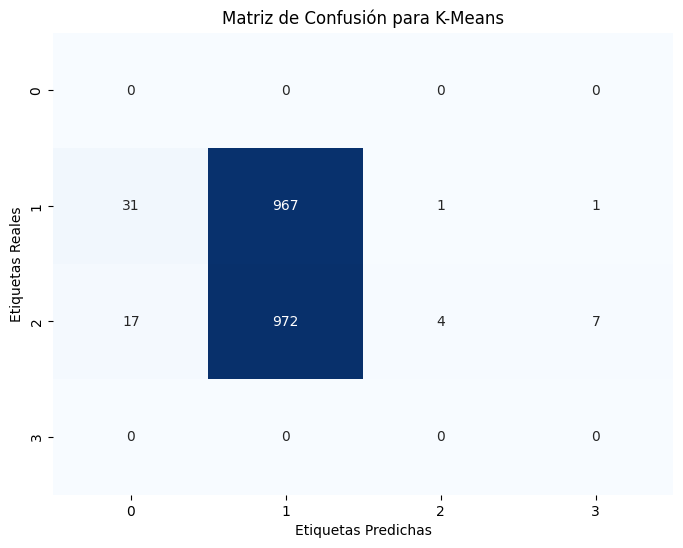

Modelo: Spectral Clustering
Purity: 0.6045
Adjusted Rand Score: 0.0321


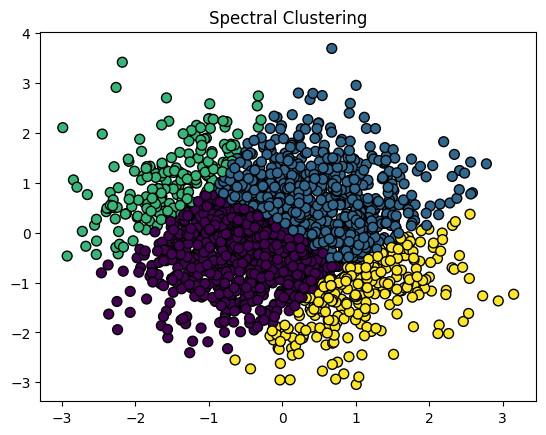

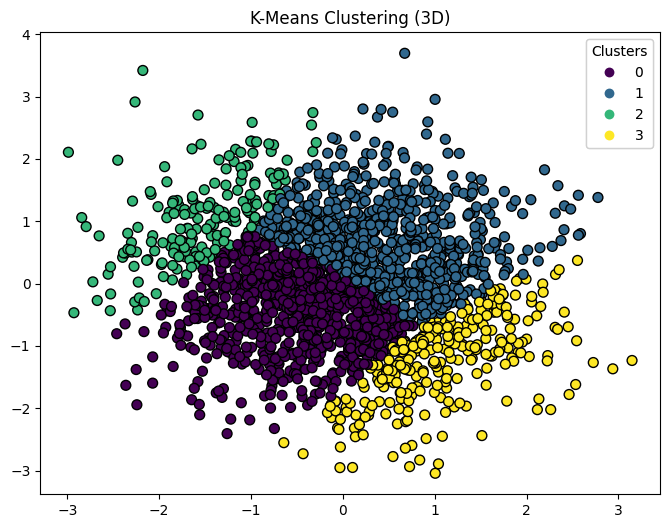

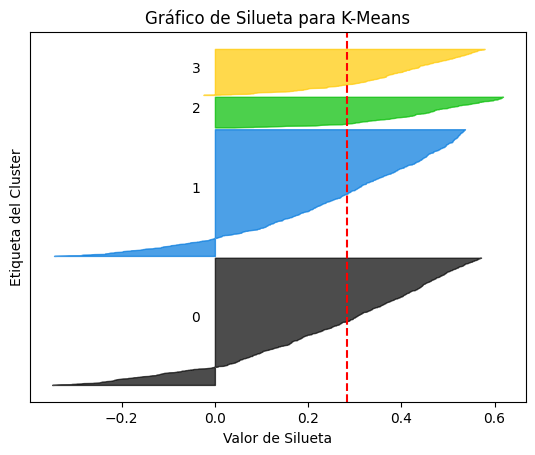

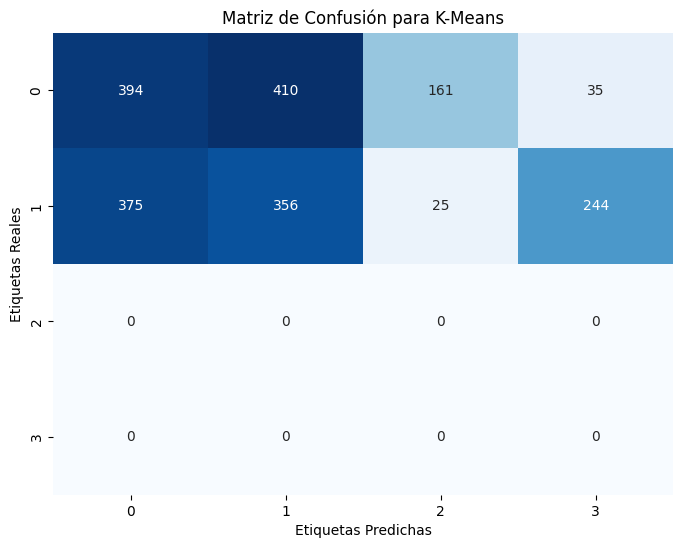

In [39]:

# K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
evaluar_clusters(ground_truth_labels, kmeans_labels, 'K-Means')
visualizar_clusters(X, kmeans_labels, "K-Means Clustering")
visualizar_clusters_3D(X, kmeans_labels, "K-Means Clustering (3D)")
grafico_silueta(X, kmeans_labels, "Gráfico de Silueta para K-Means")
mapa_calor_confusion(ground_truth_labels, kmeans_labels, "Matriz de Confusión para K-Means")

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X)
evaluar_clusters(ground_truth_labels, gmm_labels, 'Gaussian Mixture Model')
visualizar_clusters(X, gmm_labels, "Gaussian Mixture Model Clustering")
grafico_silueta(X, gmm_labels, "Gráfico de Silueta para K-Means")
grafico_silueta(X, gmm_labels, "Gráfico de Silueta para K-Means")
mapa_calor_confusion(ground_truth_labels, gmm_labels, "Matriz de Confusión para K-Means")

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(X)
evaluar_clusters(ground_truth_labels, hierarchical_labels, 'Hierarchical Clustering')
visualizar_clusters(X, hierarchical_labels, "Hierarchical Clustering")
visualizar_clusters_3D(X, hierarchical_labels, "K-Means Clustering (3D)")
grafico_silueta(X, hierarchical_labels, "Gráfico de Silueta para K-Means")
mapa_calor_confusion(ground_truth_labels, hierarchical_labels, "Matriz de Confusión para K-Means")

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
evaluar_clusters(ground_truth_labels, dbscan_labels, 'DBSCAN')
visualizar_clusters(X, dbscan_labels, "DBSCAN Clustering")
visualizar_clusters_3D(X, dbscan_labels, "K-Means Clustering (3D)")
grafico_silueta(X, dbscan_labels, "Gráfico de Silueta para K-Means")
mapa_calor_confusion(ground_truth_labels, dbscan_labels, "Matriz de Confusión para K-Means")

# Spectral Clustering
spectral = SpectralClustering(n_clusters=4, random_state=42)
spectral_labels = spectral.fit_predict(X)
evaluar_clusters(ground_truth_labels, spectral_labels, 'Spectral Clustering')
visualizar_clusters(X, spectral_labels, "Spectral Clustering")
visualizar_clusters_3D(X, spectral_labels, "K-Means Clustering (3D)")
grafico_silueta(X, spectral_labels, "Gráfico de Silueta para K-Means")
mapa_calor_confusion(ground_truth_labels, spectral_labels, "Matriz de Confusión para K-Means")